The goal of this notebook is to explore a health insurance dataset and make predictions based on certain values.

- What features/columns had a relatively even or normal distribution? Which features/columns did not?
    - The only feature with a normal distribution was BMI, the rest did not.

- How did you handle missing values? Why did you do this method as opposed to others?
    - There were no missing values

- How did you encode your categorical data? Why did you do this method as opposed to others?
    - I used One Hot Encoding because I did not have any data with any inherent order.

- How did you handle removing outliers? Why did you use this method as opposed to others?
    - The only feature with outliers was BMI. To handle these outliers, I used zscore. I tried iqr at first, but that didn't really do anything. Zscore also probably worked better because BMI had a normal distribution

- How did you normalize/standardize the data? Why did you use this method as opposed to others?
    - I used normalization to scale the data. I did this because most of the data did not have a normal distribution.

- How did each model perform? Which performed the best?
    - Each model performed relatively well. The SVM model performed best.
    - SVM:
        - R-Sqaured Score:  0.8159791383514347
        - Mean Absolute Error:  0.2217775499938004
        - Root Mean Squared Error:  0.18136363781951467
    
    - Linear:
        - R-Sqaured Score:  0.714267157903296
        - Mean Absolute Error:  0.36863585948206595
        - Root Mean Squared Error:  0.2816069179489748
    
    - Decision Tree:
        - R-Sqaured Score:  0.7228673164921159
        - Mean Absolute Error:  0.24095140686608457
        - Root Mean Squared Error:  0.2731309439016852
    
    - Neural Net:
        - R-Sqaured Score:  0.8077499720527875
        - Mean Absolute Error:  0.25106554571743656
        - Root Mean Squared Error:  0.1894739766298754

- I ran bias tests for three of the four models and they all had relatively high R-squared values and low Mean Absolute/Mean squared values so I would say no, the models did not have any relatively high amount of bias or variance.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns

# read in the data
featuresTrainDF = pd.read_csv("insurance.csv")

# peek at the data
featuresTrainDF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Describe the dataset
featuresTrainDF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
# Check for any missing data
featuresTrainDF.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Awesome! No Missing Data! Now lets take a look at the count and distribution of our different columns within the dataset.

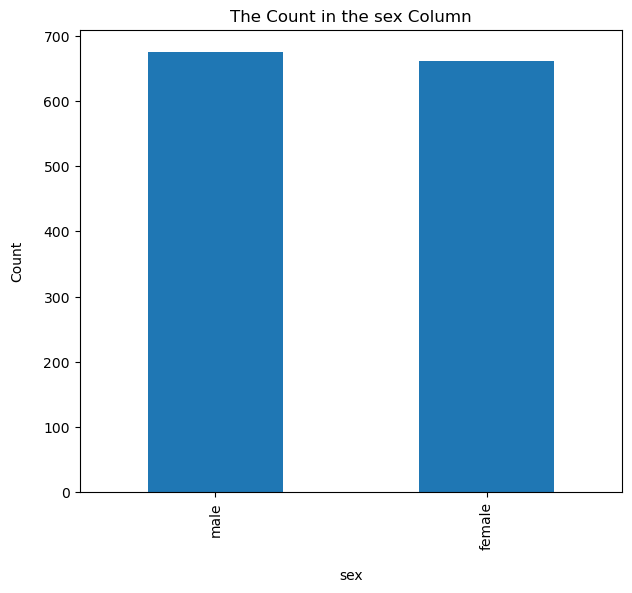

In [5]:
# Define a function to easily make bar charts
def barChart(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")

# Bar chart for the count of either male or female in the data set
barChart(featuresTrainDF, 'sex')

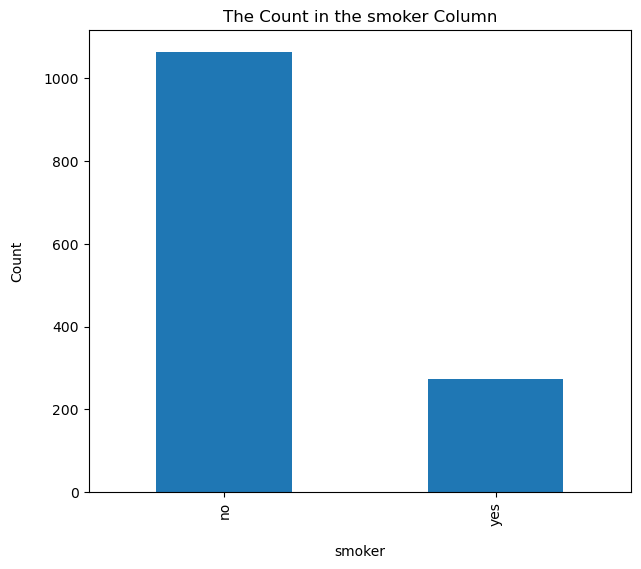

In [6]:
# Bar chart for whether or not the person is a smoker or not
barChart(featuresTrainDF, 'smoker')

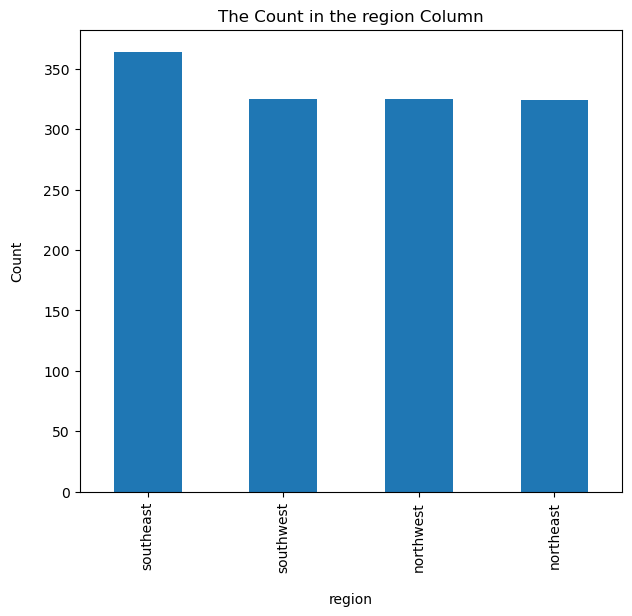

In [7]:
# Bar chart for the different regions recorded
barChart(featuresTrainDF, 'region')

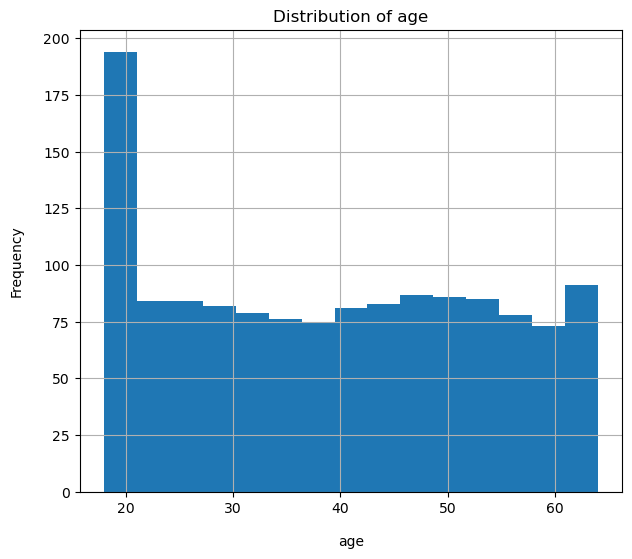

In [8]:
# Define a function to easily make histograms
def histogram(aDF, colName):
    aDF[colName].hist(bins=15, figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Frequency", labelpad=14)
    plt.title(f"Distribution of {colName}")

# Distribution of age within the dataset
histogram(featuresTrainDF, 'age')

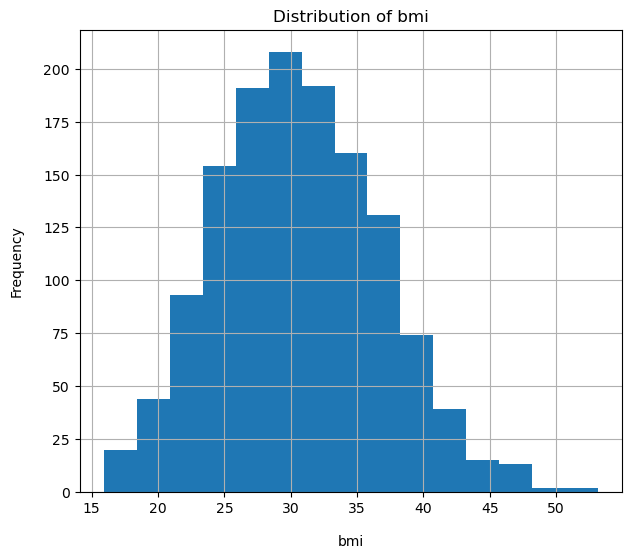

In [9]:
# Distribution of BMI within the dataset
histogram(featuresTrainDF, 'bmi')

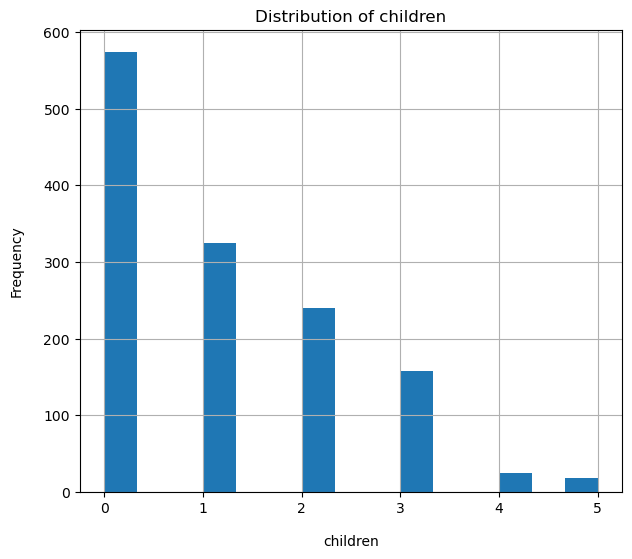

In [10]:
# Distribution of children within the data set
histogram(featuresTrainDF, 'children')

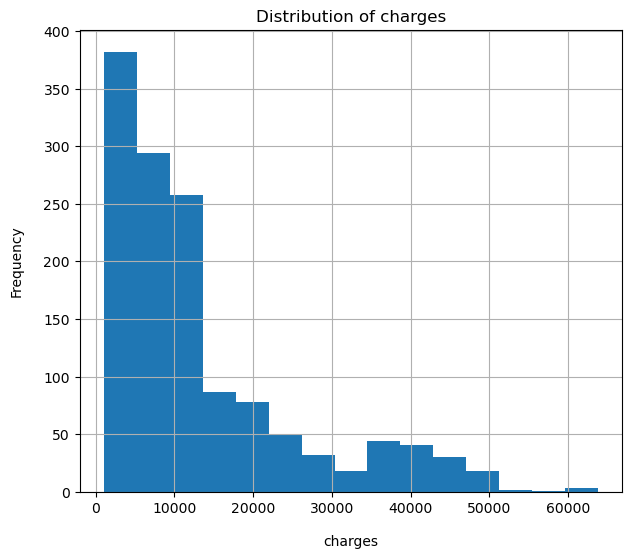

In [11]:
# Distribution of charges within the dataset
histogram(featuresTrainDF, 'charges')

Now, let's define our categorical and our numerical values within lists.

In [12]:
# Now

categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi', 'children', 'charges',]

Let's start one hot encoding our categorical data!*

*I did get help from chatGPT on this because I couldn't quite figure out how to one hot encode multiple categorical variables

prompt: "How do I oneHotEncode multiple features/columns from a dataset?"

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of one-hot-encoder
encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on categorical columns
encodedData = encoder.fit_transform(featuresTrainDF[categorical])
oneHotDF = pd.DataFrame(encodedData, columns=[item for sublist in encoder.categories_ for item in sublist])

encoder.categories_

c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [14]:
# Save our encoded data using pickle
with open("encoder.pkl", 'wb') as f:
    pkl.dump(encoder, f)

In [15]:
# Modify our dataframe

oneHotDF.columns = oneHotDF.columns.get_level_values(0)

featuresTrainDF = pd.concat([featuresTrainDF, oneHotDF], axis=1).drop(columns = ['sex', 'smoker', 'region'])
featuresTrainDF.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Using seaborn to visualize our numerical data to find any outliers

Text(0.5, 1.0, 'Box Plot of Age')

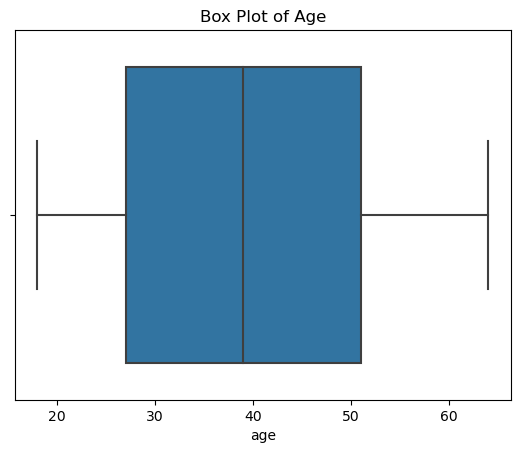

In [17]:
sns.boxplot(x=featuresTrainDF['age'])
plt.title("Box Plot of Age")

Text(0.5, 1.0, 'Box Plot of BMI')

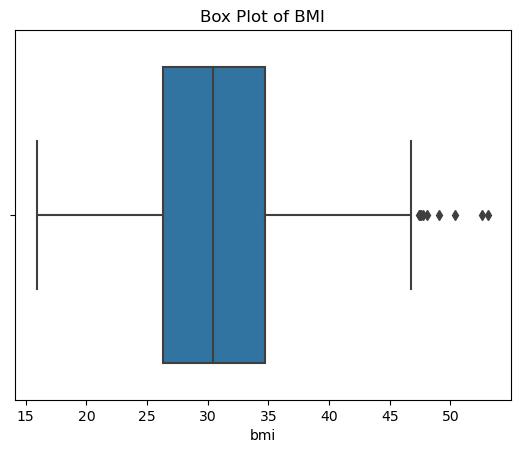

In [18]:
sns.boxplot(x=featuresTrainDF['bmi'])
plt.title("Box Plot of BMI")

Text(0.5, 1.0, 'Box Plot of Children')

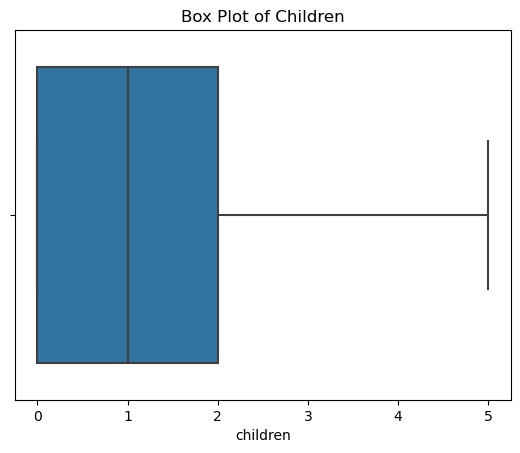

In [19]:
sns.boxplot(x=featuresTrainDF['children'])
plt.title("Box Plot of Children")

Text(0.5, 1.0, 'Box Plot of Charges')

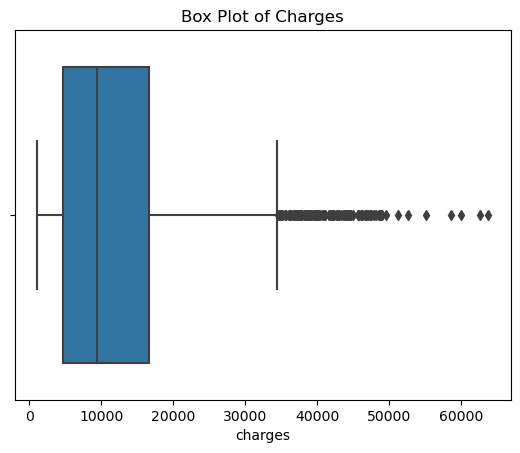

In [20]:
sns.boxplot(x=featuresTrainDF['charges'])
plt.title("Box Plot of Charges")

In [21]:
print(featuresTrainDF.shape)

(1338, 12)


It seems only BMI has outliers. Technically charges also has outliers, but that's our target variable, so it doesn't matter.

Since BMI is the only one with outliers and it's normally distributed, we'll use zscore to remove the outliers. (I tried Iqr at first because I wasn't sure, but that didn't do anything.)

In [22]:
from scipy.stats import zscore

featuresTrainCleanedDF = featuresTrainDF

# Calculate z-scores for the BMI column
featuresTrainCleanedDF['bmi_zscore'] = zscore(featuresTrainCleanedDF['bmi'])

# Define a threshold for outliers (typically, a z-score greater than 3 or less than -3)
threshold = 3

# Filter the dataset to remove outliers
featuresTrainCleanedDF = featuresTrainCleanedDF[(featuresTrainCleanedDF['bmi_zscore'] < threshold) & (featuresTrainCleanedDF['bmi_zscore'] > -threshold)]

# Display the number of rows before and after filtering
originalRowCount = featuresTrainDF.shape[0]
filteredRowCount = featuresTrainCleanedDF.shape[0]

originalRowCount, filteredRowCount


(1338, 1334)

In [23]:
# Make the 'y' dataframe

featuresTrainCleanedDF = featuresTrainCleanedDF.reset_index().drop(columns="index")

yDF = pd.DataFrame(featuresTrainCleanedDF["charges"])

yDF.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [24]:
# Make the 'x' dataframe

xDF = featuresTrainCleanedDF.drop(columns=['charges'])

xDF.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,bmi_zscore
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.453320
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.509621
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.383307
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.305531
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.292556


In [25]:
print(xDF.shape)
print(yDF.shape)

(1334, 12)
(1334, 1)


In [26]:
# Initialize the test, train, split

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF,
                                                test_size = 0.3,
                                                shuffle=True)

xTrain.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,bmi_zscore
722,19,35.400,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.777014
1319,42,40.370,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.592315
951,44,30.200,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.076018
406,47,23.600,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.158711
648,58,32.965,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.377565


In [27]:
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
yScaler = StandardScaler()

colNames = xTrain.columns.values.tolist()
xTrain[colNames] = xScaler.fit_transform(xTrain[colNames])

colNames = yTrain.columns.values.tolist()
yTrain[colNames] = yScaler.fit_transform(yTrain[colNames])

colNames = xTrain.columns.values.tolist()
xTest[colNames] = xScaler.transform(xTest[colNames])

colNames = yTrain.columns.values.tolist()
yTest[colNames] = yScaler.transform(yTest[colNames])

xTrain.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,bmi_zscore
722,-1.423824,0.797177,-0.920363,-0.992525,0.992525,0.477108,-0.477108,-0.563735,-0.576938,-0.608312,1.784336,0.797177
1319,0.226130,1.627895,0.699823,1.007531,-1.007531,-2.095964,2.095964,-0.563735,-0.576938,1.643892,-0.560432,1.627895
951,0.369604,-0.071985,0.699823,-0.992525,0.992525,-2.095964,2.095964,-0.563735,-0.576938,-0.608312,1.784336,-0.071985
406,0.584815,-1.175152,-0.110270,1.007531,-1.007531,0.477108,-0.477108,-0.563735,-0.576938,-0.608312,1.784336,-1.175152
648,1.373923,0.390175,-0.920363,1.007531,-1.007531,0.477108,-0.477108,1.773885,-0.576938,-0.608312,-0.560432,0.390175


In [28]:
with open("xScaler.pkl", 'wb') as f:
    pkl.dump(xScaler, f)

with open("yScaler.pkl", 'wb') as f:
    pkl.dump(yScaler, f)

In [29]:
yTrain.head()

,charges
722,-0.994681
1319,2.672981
951,2.251629
406,-0.368701
648,-0.033940


In [30]:
yTest.head()

,charges
202,2.091216
955,-0.018547
1249,0.293131
1090,1.813658
437,-0.020040


In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTest)

r2 = r2_score(yTest, preds)
print("R-Sqaured Score: ", r2)

mae = mean_absolute_error(yTest, preds)
print("Mean Absolute Error: ", mae)

rmse = mean_squared_error(yTest, preds)
print("Root Mean Squared Error: ", rmse)

R-Sqaured Score:  0.7686909735720316
Mean Absolute Error:  0.3718253204264764
Root Mean Squared Error:  0.2909971803052073


In [32]:
from sklearn import svm

svmModel = svm.SVR().fit(xTrain, yTrain)

preds = svmModel.predict(xTest)

r2 = r2_score(yTest, preds)
print("R-Sqaured Score: ", r2)

mae = mean_absolute_error(yTest, preds)
print("Mean Absolute Error: ", mae)

rmse = mean_squared_error(yTest, preds)
print("Root Mean Squared Error: ", rmse)

R-Sqaured Score:  0.8622995558539375
Mean Absolute Error:  0.22255363243195284
Root Mean Squared Error:  0.1732333648715485


c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Bias testing
preds = svmModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds))

0.8443856124312794
0.19875748867794177
0.1556143875687206


In [34]:
from sklearn import tree

dtModel = tree.DecisionTreeRegressor().fit(xTrain, yTrain)

preds = dtModel.predict(xTest)

r2 = r2_score(yTest, preds)
print("R-Sqaured Score: ", r2)

mae = mean_absolute_error(yTest, preds)
print("Mean Absolute Error: ", mae)

rmse = mean_squared_error(yTest, preds)
print("Root Mean Squared Error: ", rmse)

R-Sqaured Score:  0.7772645499903367
Mean Absolute Error:  0.2395773777519647
Root Mean Squared Error:  0.28021123476133597


In [35]:
# Bias testing
preds = dtModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds))

0.9979269854102596
0.002917645428162162
0.002073014589740425


In [36]:
from sklearn.neural_network import MLPRegressor

nnModel = MLPRegressor().fit(xTrain, yTrain)

preds = nnModel.predict(xTest)

r2 = r2_score(yTest, preds)
print("R-Sqaured Score: ", r2)

mae = mean_absolute_error(yTest, preds)
print("Mean Absolute Error: ", mae)

rmse = mean_squared_error(yTest, preds)
print("Root Mean Squared Error: ", rmse)

c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-Sqaured Score:  0.8632534113205804
Mean Absolute Error:  0.24790344391756758
Root Mean Squared Error:  0.1720333717044066


c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
# Bias testing
preds = nnModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds))

0.8738680164598162
0.2115906346801446
0.12613198354018387


In [38]:
with open("linearModel.pkl", 'wb') as f:
    pkl.dump(model, f)

with open("SVMModel.pkl", 'wb') as f:
    pkl.dump(svmModel, f)

with open("treeModel.pkl", 'wb') as f:
    pkl.dump(dtModel, f)

with open("nnModel.pkl", 'wb') as f:
    pkl.dump(nnModel, f)